In [0]:
train = "https://raw.githubusercontent.com/rani700/corona/master/datasets/train.csv"
test = "https://raw.githubusercontent.com/rani700/corona/master/datasets/test.csv"

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

In [0]:
df_train = df_train.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'})
df_test = df_test.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'})

In [5]:
df_train.head()

,Id,State,Country,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [6]:
df_test.head()

,ForecastId,State,Country,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [7]:
df_train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,16188.000000,16188.000000,16188.000000,16188.000000,16188.000000
mean,13188.500000,26.287693,4.766191,249.483012,8.237583
std,7624.693647,22.935159,79.923496,3168.929157,132.127695
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6594.750000,13.145425,-71.516375,0.000000,0.000000
50%,13188.500000,32.985550,9.775000,0.000000,0.000000
75%,19782.250000,42.501575,64.688975,5.000000,0.000000
max,26376.000000,71.706900,174.886000,67800.000000,3122.000000


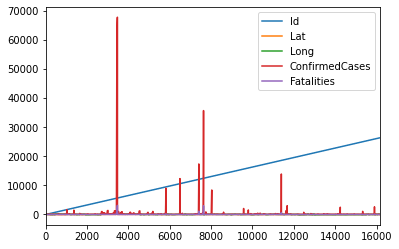

In [8]:
df_train.plot()

In [9]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 33.9MB/s 
     |████████████████████████████████| 10.4MB 48.9MB/s 


In [0]:
import geopandas

In [0]:
df_train = geopandas.GeoDataFrame(
    df_train, geometry=geopandas.points_from_xy(df_train.Long, df_train.Lat))

df_test = geopandas.GeoDataFrame(
    df_test, geometry=geopandas.points_from_xy(df_test.Long, df_test.Lat))

In [12]:
df_train

,Id,State,Country,Lat,Long,Date,ConfirmedCases,Fatalities,geometry
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,POINT (65.00000 33.00000)
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0,POINT (65.00000 33.00000)
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,POINT (65.00000 33.00000)
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,POINT (65.00000 33.00000)
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,POINT (65.00000 33.00000)
...,...,...,...,...,...,...,...,...,...
16183,26372,NaN,Zambia,-15.4167,28.2833,2020-03-14,0.0,0.0,POINT (28.28330 -15.41670)
16184,26373,NaN,Zambia,-15.4167,28.2833,2020-03-15,0.0,0.0,POINT (28.28330 -15.41670)
16185,26374,NaN,Zambia,-15.4167,28.2833,2020-03-16,0.0,0.0,POINT (28.28330 -15.41670)
16186,26375,NaN,Zambia,-15.4167,28.2833,2020-03-17,0.0,0.0,POINT (28.28330 -15.41670)


In [0]:
def plot_on_map(mdf, title=""):
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
  ax = world.plot(
      color='white', edgecolor='black', figsize=(18, 15))
  plt.title(title)

  mdf.plot(ax=ax, color='#ee7722')
  plt.show()

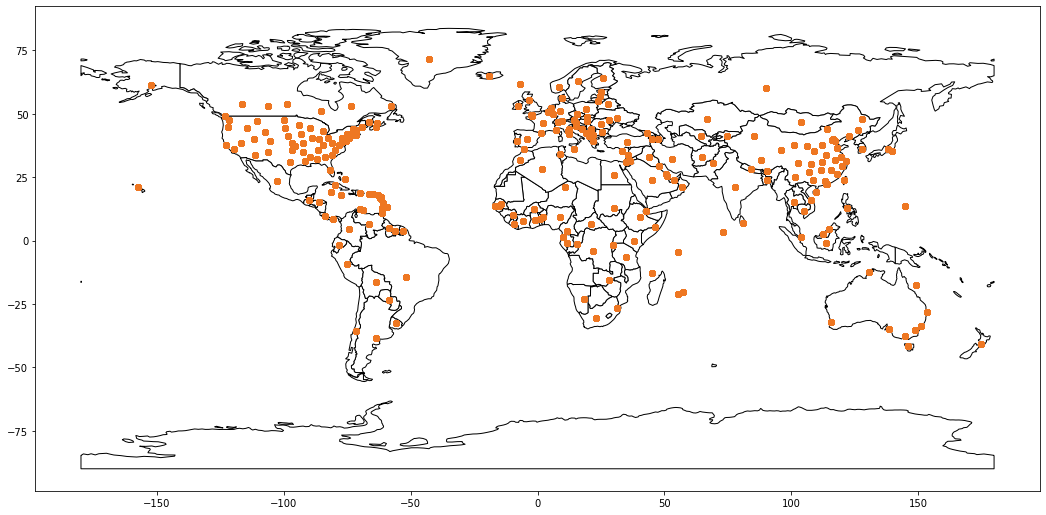

In [14]:
plot_on_map(df_train)

In [0]:
Countries = np.unique(df_train.iloc[:, 2].values)

In [16]:
Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

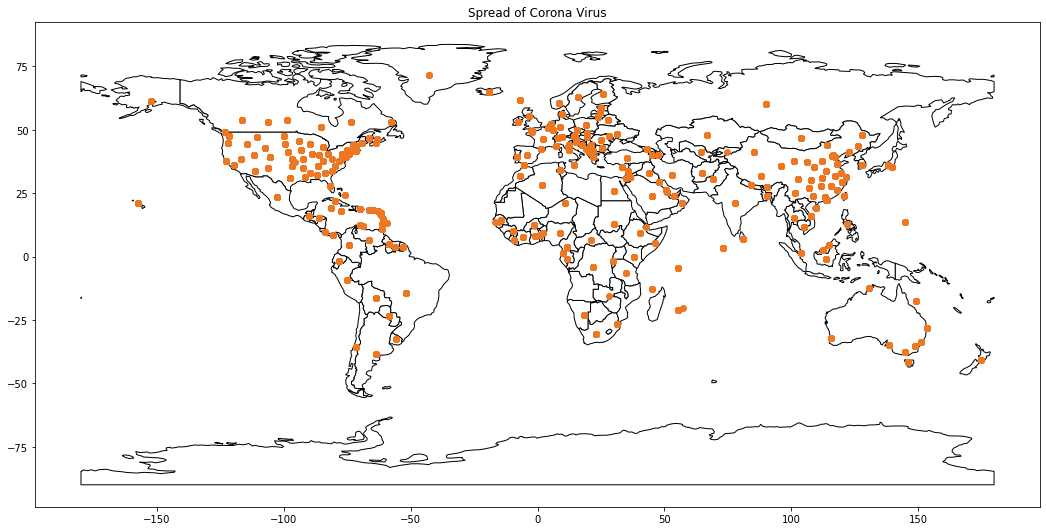

In [17]:
plot_on_map(df_train.query("ConfirmedCases > 0.0"), "Spread of Corona Virus")

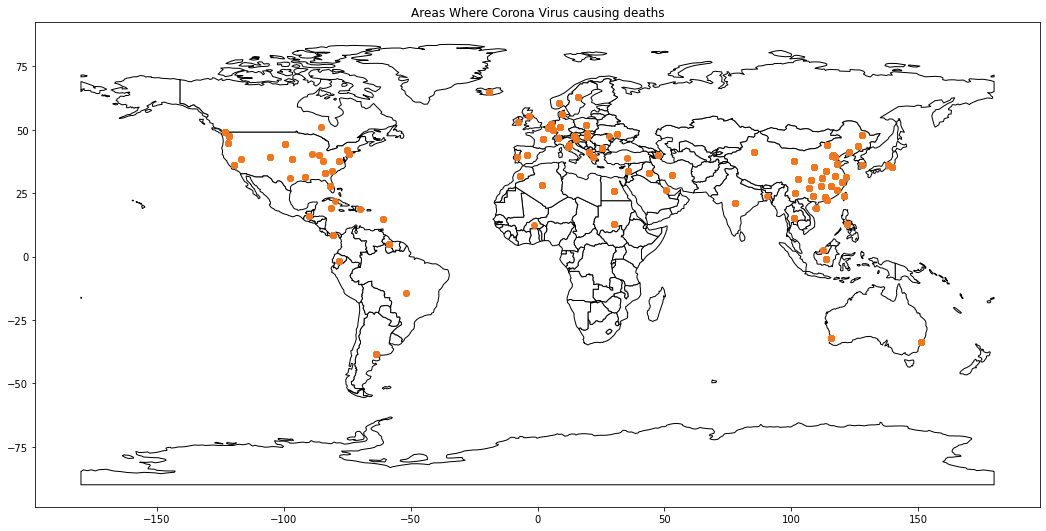

In [18]:
plot_on_map(df_train.query("Fatalities > 0.0"), "Areas Where Corona Virus causing deaths")

In [0]:
region = df_train.fillna("na").iloc[:, [1, 2]].values

In [0]:
total_regions = []
for i in range(1, len(region)):
  c = region[i-1][1]
  s = region[i-1][0]
  if region[i][1] != c or region[i][0] != s:  
    ob = {}
    ob['country'] = region[i][1]
    ob['state'] = region[i][0]
    total_regions.append(ob)

In [21]:
pd.Series( total_regions )

0                  {'country': 'Albania', 'state': 'na'}
1                  {'country': 'Algeria', 'state': 'na'}
2                  {'country': 'Andorra', 'state': 'na'}
3      {'country': 'Antigua and Barbuda', 'state': 'na'}
4                {'country': 'Argentina', 'state': 'na'}
                             ...                        
278                {'country': 'Uruguay', 'state': 'na'}
279             {'country': 'Uzbekistan', 'state': 'na'}
280              {'country': 'Venezuela', 'state': 'na'}
281                {'country': 'Vietnam', 'state': 'na'}
282                 {'country': 'Zambia', 'state': 'na'}
Length: 283, dtype: object

In [0]:

# for r in total_regions:
#   q = "Country == '"+r['country']+"'"
#   if r['state'] != 'na':
#     q += "and State == '"+r['state']+"'"
#   try:
#     print(len(df_train.query(q).iloc[: , [6, 7]].values))
#   except Exception:
#     print("e")


In [0]:
# df_train.query("Country == 'Afghanistan'")